# Heart Disease Prediction using Logistic Regression
This notebook is created for classifying binary classification of heart disease i.e. whether the patient has the 10 year risk of coronary heart disease or not. Since logistic regression is used to model binary dependent variable, i used it to estimate the probabilities of the problem.
# Dataset
https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
Data = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Here, we are dropping the Education feature, since it is not relevant with weither the patient will get affected with CHD or not.

After that we are dropping the rows containing null values since they dont contain all the feature information regarding the specific patient.

In [3]:
Data.drop(['education'], axis=1, inplace=True)
Data.isnull().sum()

Data.dropna(axis = 0, inplace = True)
print(Data.shape[0])
Data.isnull().sum()


3749


male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [4]:
Y = Data.TenYearCHD.values
X = Data.drop(['TenYearCHD'], axis = 1)

In [5]:
sc= StandardScaler()
X = sc.fit_transform(X)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(14, 2999)
(2999,)
(750,)


# Logistic Regression
**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b $$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is computed by taking the summation of all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

At first, we initialize the weights and bias as vectors of zeros.

In [7]:
###Initialize the weights and bias
def initialize_W_b_with_zeros(num_features):
    w = np.zeros(shape = (num_features,1))
    b = 0
    return w,b

Here, we defined sigmoif function.

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [8]:
### Sigmoid Function

def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    
    return s

# Propagation
For forward propagation we compute

$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$

then compute the cost function:

$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Then, for backward propagation, we compute the gradients dw and db by taking the derivatives.

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [9]:
#Forward and Backward propagation function 
def propagate(w,b, X,Y):
    
    m = X.shape[1]
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    loss =  - (Y * np.log(A) + (1-Y) * np.log( 1-A) )
    cost=  np.sum(loss)/m
    
    dw = (1 / m) * np.dot(X, (A-Y).T)
    db = (1 / m) * np.sum(A-Y)
    
    gradient= {"dw": dw,
             "db": db}
    
    return gradient, cost

# Update the weights and biases

Here, we update the weights and biases after every iteration of the propagation. we record the updated weights for the next iteration and also try to minimize the cost at each iteration.

In [10]:
def update(w,b, X,Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range( num_iterations ):
        gradient, cost = propagate(w,b, X,Y)
        
        dw = gradient['dw']
        db = gradient['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 20 == 0:
            costs.append(cost)
            
    parameters = {"w": w,
                 "b": b}
    
    gradient= {"dw": dw,
             "db": db}
    
    return parameters, gradient, costs

# Prediction

After creating the logistic regression model, we use test set for predicting the output.

$\hat{Y} = A = \sigma(w^T X + b)$

We take an numpy array of m columns for m data samples to predict the output $\hat{Y}$ 

In [11]:
def predict( w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid( np.dot(w.T , X) + b)
    
    for i in range(A.shape[1]):
        if A[:,i] > 0.5 :
              Y_prediction[:,i] = 1 
      
    return Y_prediction
    

# Logistic Regression Model
It is the final function integrating all the functions. We take the number of features present in the dependent variable which is X_Train in this case. the number of features is 14 for this dataset. So we initialize weights and biases of that diemnsion. 

The model uses training set to learn the optimized weights and biases which then we use for test set. finally, we calculate the test accuracy.



In [12]:
def Logistic_Regression_model(X_train, X_test, Y_train, Y_test,num_iterations, learning_rate ):
    num_features = X_train.shape[0]
    w,b = initialize_W_b_with_zeros(num_features)
    parameters, gradient, costs = update(w,b, X_train,Y_train, num_iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_Test_Predict = predict(w,b, X_test)
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_Test_Predict - Y_test)) * 100))

    
    Dictionary = {"Prediction ": Y_Test_Predict,
                "Weight": w,
                "Bias" :b,
                "Cost Function" : costs}
    
    return Dictionary

In [13]:
Dictionary = Logistic_Regression_model(X_train, X_test, Y_train, Y_test, num_iterations = 1000, learning_rate = 0.10 )


test accuracy: 84.4 %


test accuracy: 84.4 %

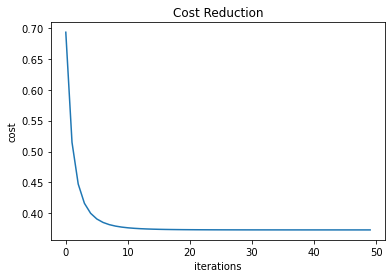

In [14]:
# # Plot learning curve (with costs)
# import matplotlib.pyplot as plt
# costs = np.squeeze(Dictionary['Cost Function'])
# plt.plot(costs)
# plt.ylabel('cost')
# plt.xlabel('iterations')
# plt.title("Cost Reduction")
# plt.show()

For ensuring the accuracy of our model, the Logistic Regression classifier of Sklearn is given.

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train.T,Y_train.T)
print("test accuracy {}".format(lr.score(X_test.T,Y_test.T)))  
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

test accuracy 0.844
